<a href="https://colab.research.google.com/github/Melo987/-v2/blob/main/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **感知机**

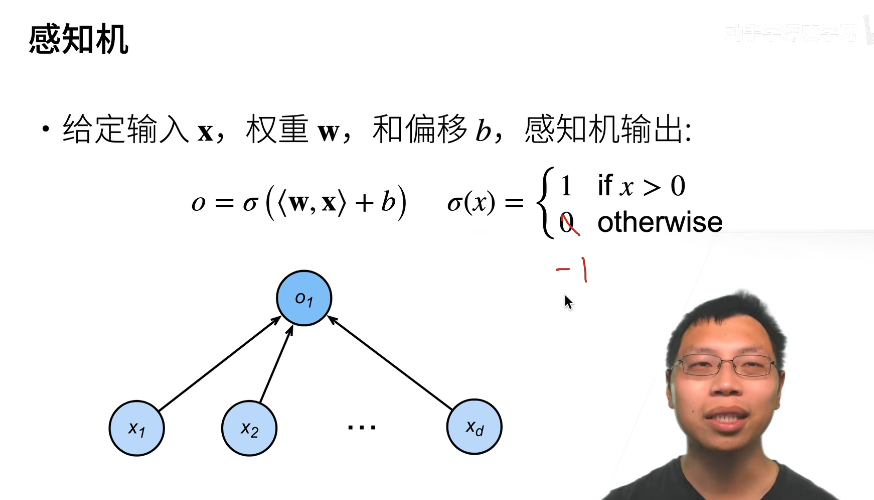

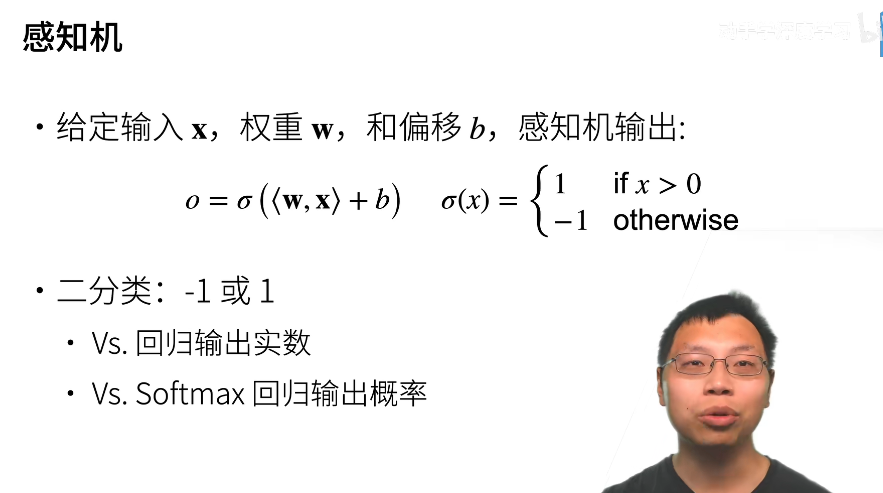

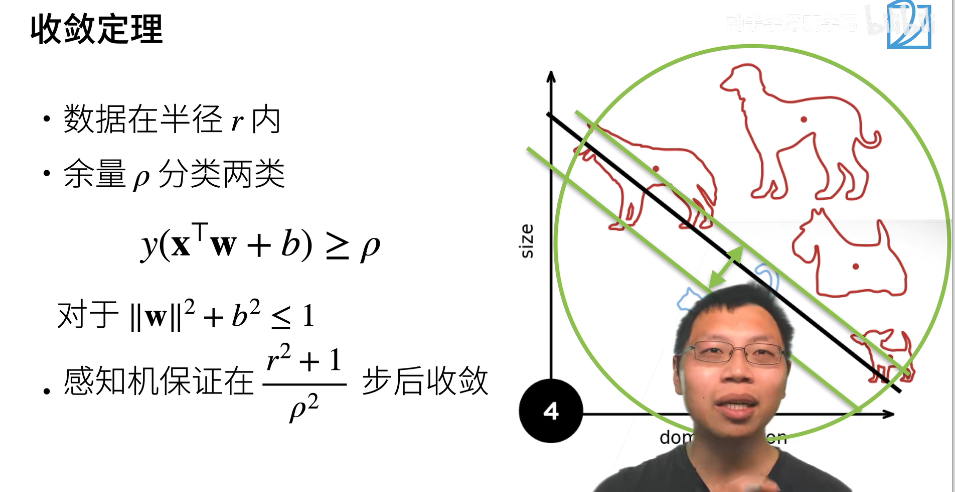

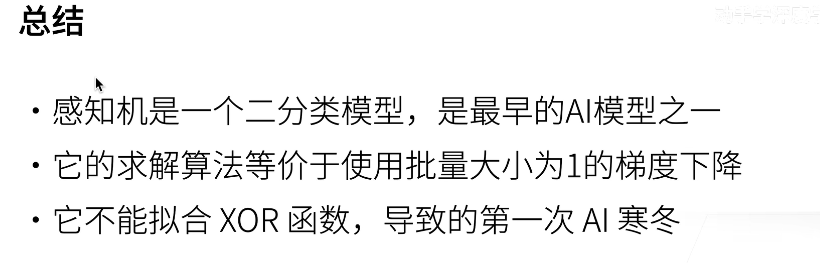

# 多层感知机

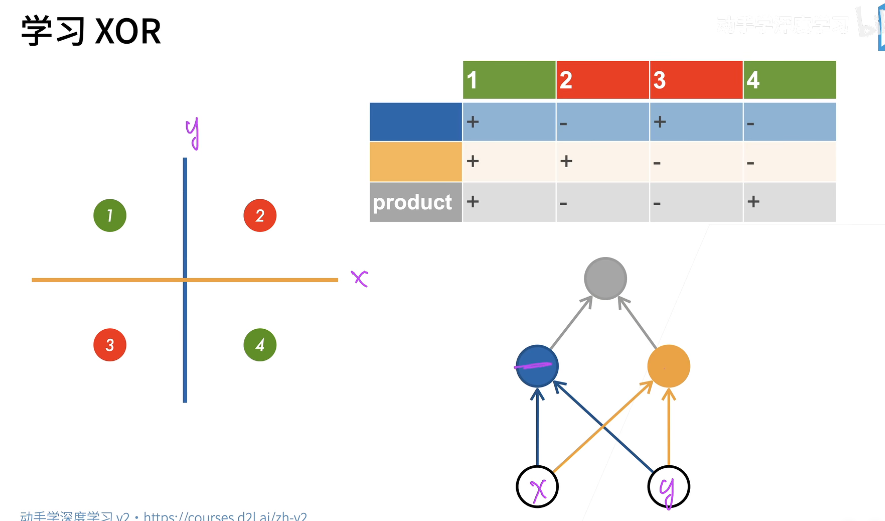

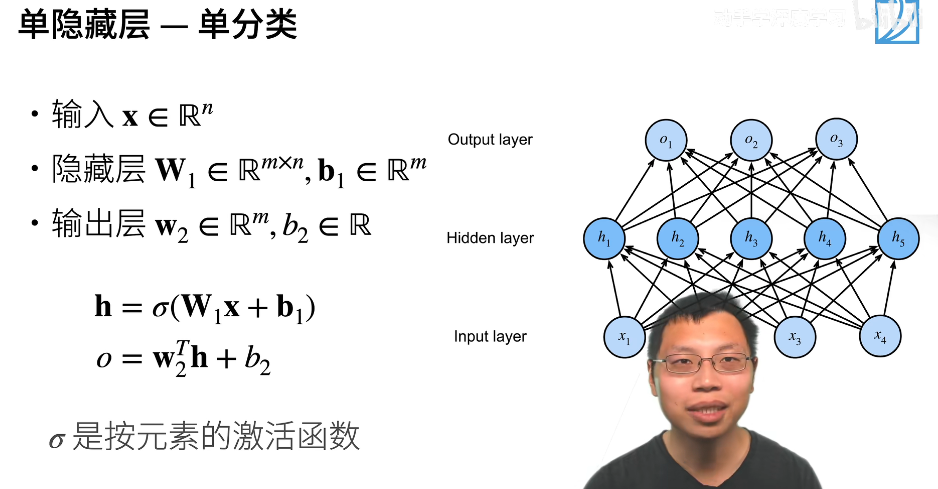

**隐藏层需要加入非线性的激活函数，若加入的线性激活函数，其结果也是线性的，与单层感知机无异**

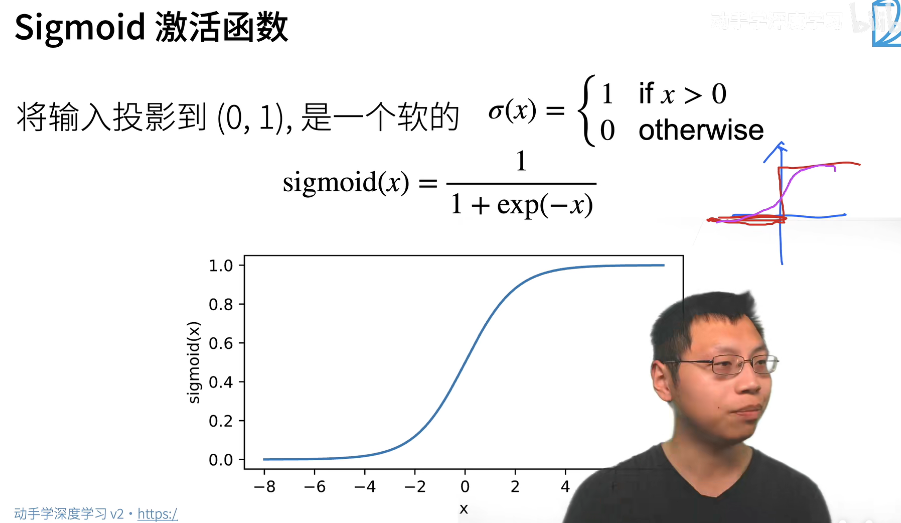

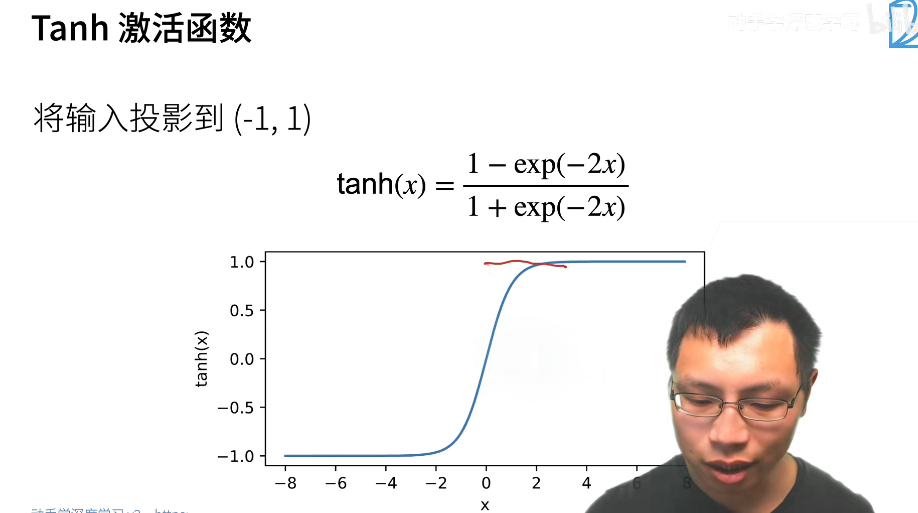

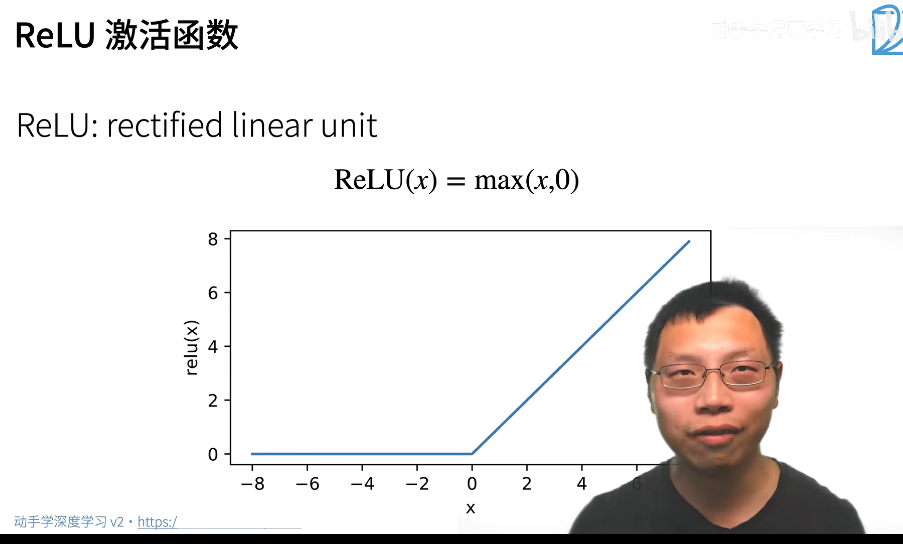

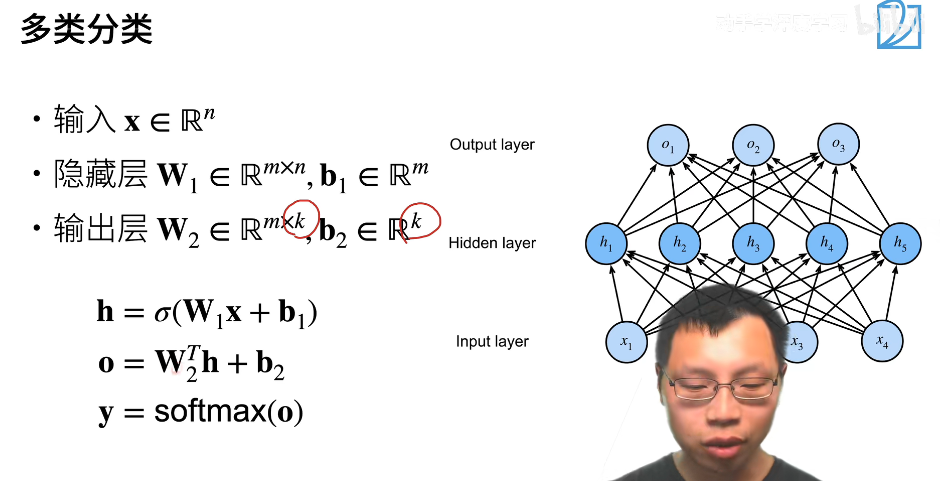

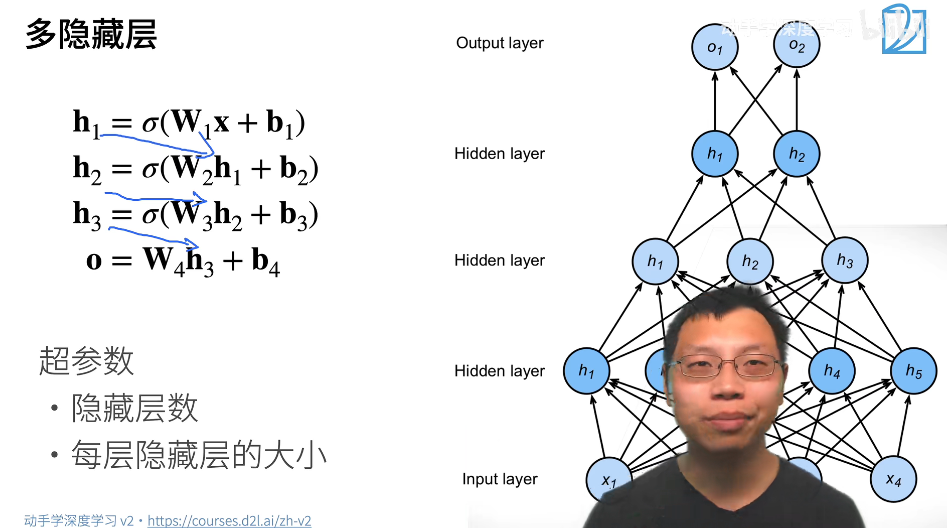

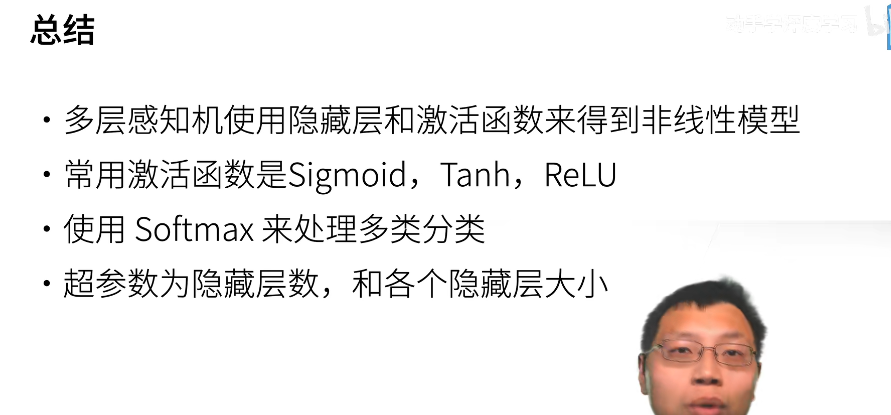

# 代码实现

In [2]:
!pip install -U d2l 

In [8]:
!pip install matplotlib==3.0.

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


**初始化模型参数**

In [4]:
# 实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元

In [12]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs,num_hiddens,requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True)*0.01)
W2 = nn.Parameter(torch.randn(
    num_hiddens,num_outputs,requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True)*0.01)

params = [W1, b2, W2, b2]

**激活函数**

In [ ]:
# 实现ReLu激活函数

In [6]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X,a)

**模型**

In [9]:
def net(X):
  X = X.reshape((-1,num_inputs)) #-1是指batchsize
  H = relu(X@W1 + b1) # @代表矩阵乘法
  return (H@W2 + b2)

**损失函数**

In [10]:
loss = nn.CrossEntropyLoss(reduction='none')

**训练**

In [ ]:
# 多层感知机的训练过程与Softmax回归训练过程完全相同

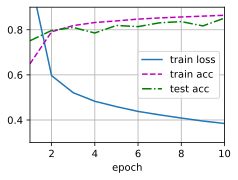

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


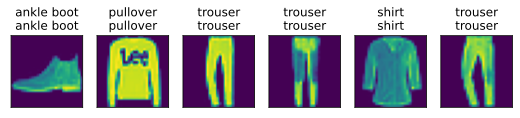

In [14]:
d2l.predict_ch3(net,test_iter)

# 简介实现

In [15]:
import torch
from torch import nn
from d2l import torch as d2l

隐藏层包含256个隐藏单元，并使用了ReLu函数

In [20]:
from torch.random import initial_seed
net = nn.Sequential(
    nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)
  
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

训练

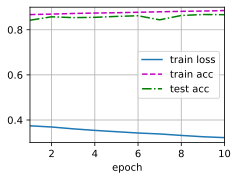

In [22]:
batch_size,lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(),lr=lr)

train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)